## Import libs

In [55]:
import numpy as np
print("numpy version: {}".format(np.__version__))
import pandas as pd 
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
print("matplotlib version: {}".format(matplotlib.__version__))
import scipy as sp
print("scipy version: {}".format(sp.__version__))
import sklearn as sl
print("scikit-learn: {}".format(sl.__version__))
import seaborn as sns
print("seaborn: {}".format(sns.__version__))
import statsmodels as sm
print("statsmodels: {}".format(sm.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

numpy version: 1.17.4
pandas version: 0.25.3
matplotlib version: 3.1.2
scipy version: 1.3.3
scikit-learn: 0.21.3
seaborn: 0.9.0
statsmodels: 0.10.2


In [56]:
data_path = '/home/vlad/.data/house_price'

In [57]:
from subprocess import check_output
print(check_output(["ls", data_path]).decode("utf8"))

data_description.txt
house-prices-advanced-regression-techniques.zip
sample_submission.csv
test.csv
train.csv



In [58]:
df_test = pd.read_csv(data_path + '/test.csv')
df_train = pd.read_csv(data_path + '/train.csv')

In [59]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [60]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [61]:
target_variable = df_train.SalePrice
train_id = df_train.Id
test_id = df_test.Id
df_train.drop("Id", inplace=True, axis=1)
df_test.drop("Id", inplace=True, axis=1)

In [62]:
dataframes = [df_train, df_test]

In [63]:
df_train.info()
print('-' * 25)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [64]:
print('Train columns with null values:\n', df_train.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', df_test.isnull().sum())
print("-"*10)

df_train.describe(include = 'all')

Train columns with null values:
 MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64
----------
Test/Validation columns with null values:
 MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64
----------


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [65]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

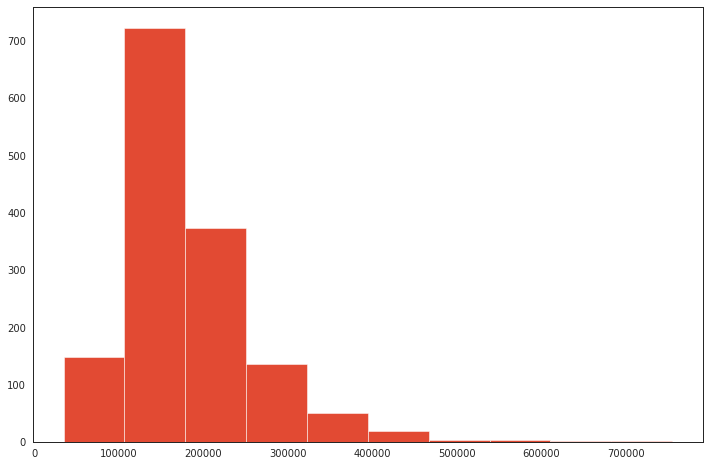

In [66]:
plt.hist(df_train.SalePrice);

In [67]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [68]:
print("Skew: {}\nKurtosis: {}".format(df_train.SalePrice.skew(), df_train.SalePrice.kurt()))

Skew: 1.8828757597682129
Kurtosis: 6.536281860064529


### Log of target variable

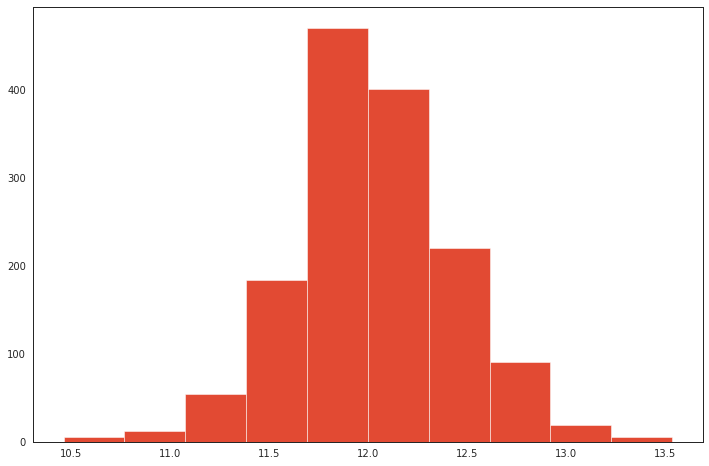

In [69]:
plt.hist(np.log(df_train.SalePrice));

In [70]:
print("Skew: {}\nKurtosis: {}".format(np.log(df_train.SalePrice).skew(), 
                                      np.log(df_train.SalePrice).kurt()))

Skew: 0.12133506220520406
Kurtosis: 0.8095319958036296


Drop most missing variables

In [71]:
missing_percentage(df_train)[missing_percentage(df_train)['Total'] != 0]

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageCond,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


In [72]:
missing_percentage(df_test)[missing_percentage(df_test)['Total'] != 0]

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageFinish,78,5.35
GarageYrBlt,78,5.35
GarageQual,78,5.35


In [73]:
train_columns_to_drop = missing_percentage(df_train)[missing_percentage(df_train)['Percent'] > 10].index

In [74]:
test_columns_to_drop = missing_percentage(df_test)[missing_percentage(df_test)['Percent'] > 10].index

In [75]:
train_columns_to_drop, test_columns_to_drop

(Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
        'LotFrontage'],
       dtype='object'),
 Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
        'LotFrontage'],
       dtype='object'))

In [76]:
train_columns_to_drop == test_columns_to_drop

array([ True,  True,  True,  True,  True,  True])

In [77]:
for dataframe in dataframes:
    dataframe.drop(columns=train_columns_to_drop, inplace=True)

In [78]:
missing_percentage(df_train)[missing_percentage(df_train)['Percent'] >= 10]

,Total,Percent


In [79]:
missing_percentage(df_test)[missing_percentage(df_test)['Percent'] >= 10]

,Total,Percent


In [80]:
df_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [81]:
df_train.shape, df_test.shape

((1460, 74), (1459, 73))

In [82]:
df_train.head(3)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [83]:
df_train.dtypes.value_counts()

object     38
int64      34
float64     2
dtype: int64

In [84]:
def display_object_types(dataframe):
    obj_columns = [col for col in dataframe.columns if dataframe[col].dtype == np.object]
    print('Categorical variables:')
    print('-' * 25)
    print('\n'.join(obj_columns))
    print('-' * 25)
    print(f'amount - {len(obj_columns)}')
    print('-' * 25)
    non_obj_columns = [col for col in dataframe.columns if dataframe[col].dtype != np.object]
    print('Qulitative variables:')
    print('-' * 25)
    print('\n'.join(non_obj_columns))
    print('-' * 25)
    print(f'amount - {len(non_obj_columns)}')

In [85]:
display_object_types(df_test)

Categorical variables:
-------------------------
MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition
-------------------------
amount - 38
-------------------------
Qulitative variables:
-------------------------
MSSubClass
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
-------------------------
amount - 35


In [86]:
display_object_types(df_train)

Categorical variables:
-------------------------
MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition
-------------------------
amount - 38
-------------------------
Qulitative variables:
-------------------------
MSSubClass
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
-------------------------
amount - 36


In [87]:
df_train_mis = missing_percentage(df_train)[missing_percentage(df_train)['Total'] != 0].swapaxes("index", "columns")
display_object_types(df_train_mis)
del df_train_mis

Categorical variables:
-------------------------

-------------------------
amount - 0
-------------------------
Qulitative variables:
-------------------------
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
BsmtFinType2
BsmtExposure
BsmtFinType1
BsmtCond
BsmtQual
MasVnrType
MasVnrArea
Electrical
-------------------------
amount - 13


In [88]:
df_test_mis = missing_percentage(df_test)[missing_percentage(df_test)['Total'] != 0].swapaxes("index", "columns")
display_object_types(df_test_mis)
del df_test_mis

Categorical variables:
-------------------------

-------------------------
amount - 0
-------------------------
Qulitative variables:
-------------------------
GarageQual
GarageCond
GarageYrBlt
GarageFinish
GarageType
BsmtCond
BsmtQual
BsmtExposure
BsmtFinType1
BsmtFinType2
MasVnrType
MasVnrArea
MSZoning
Functional
BsmtHalfBath
BsmtFullBath
Utilities
KitchenQual
Exterior2nd
SaleType
GarageCars
TotalBsmtSF
GarageArea
BsmtUnfSF
BsmtFinSF2
BsmtFinSF1
Exterior1st
-------------------------
amount - 27


In [89]:
all_columns = df_train.columns.values
non_categorical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
                   "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
                   "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
                   "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                   "ScreenPorch","PoolArea", "MiscVal"]

categorical = [value for value in all_columns if value not in non_categorical]

In [90]:
data = pd.concat([df_train, df_test], ignore_index=True)
data.drop(columns="SalePrice", inplace=True)

In [109]:
nans = pd.isnull(data).sum()
nans[nans>0]

array([], dtype=int64)

In [92]:
data.dtypes.value_counts()

object     38
int64      25
float64    10
dtype: int64

In [93]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


????

In [ ]:
from sklearn.preprocessing import Imputer
# One Hot Encoding and nan transformation
data = pd.get_dummies(data)

imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
data = imp.fit_transform(data)

# Log transformation
target_variable = np.log(target_variable)

????

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [96]:
start_time = time.time()
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(data)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)
print(f"time - {time.time() - start_time}")

time - 0.0853888988494873


In [97]:
start_time = time.time()
pca = PCA(n_components=36,whiten=True)
pca = pca.fit(data)
dataPCA = pca.transform(data)
print(f"time - {time.time() - start_time}")

time - 0.054171085357666016


In [98]:
# Split traing and test
df_train = data[:1460]
df_test = data[1460:]

In [99]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [100]:
def lets_try(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns = ["R Square Score"] 
    results = results.sort_values(by = ["R Square Score"], ascending = False)
    results.plot(kind = "bar",title = "Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5, 1])
    return results

                R Square Score
Bayesian Ridge    8.599711e-01
RandomForest      8.511648e-01
Lasso             8.493228e-01
Ridge             8.459344e-01
SVM Linear        8.442845e-01
Bagging           8.427311e-01
AdaBoost          8.032475e-01
SVM RBF           7.609827e-01
Hubber           -1.713684e+01
Linear           -7.448605e+23
time - 180.832622051239


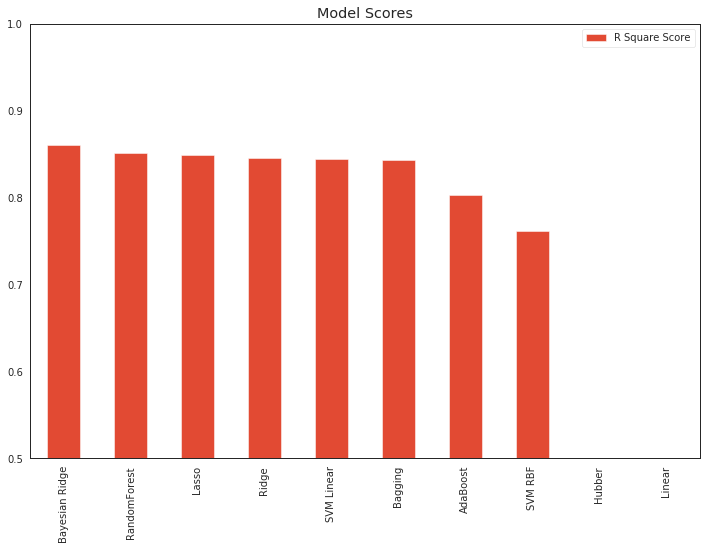

In [101]:
start_time = time.time()
print(lets_try(df_train, target_variable))
print(f"time - {time.time() - start_time}")

                R Square Score
SVM Linear            0.846111
Hubber                0.843260
Bayesian Ridge        0.841273
Ridge                 0.841057
Lasso                 0.841057
Linear                0.840980
Bagging               0.840843
RandomForest          0.828785
AdaBoost              0.785202
SVM RBF               0.766792
time - 13.174204587936401


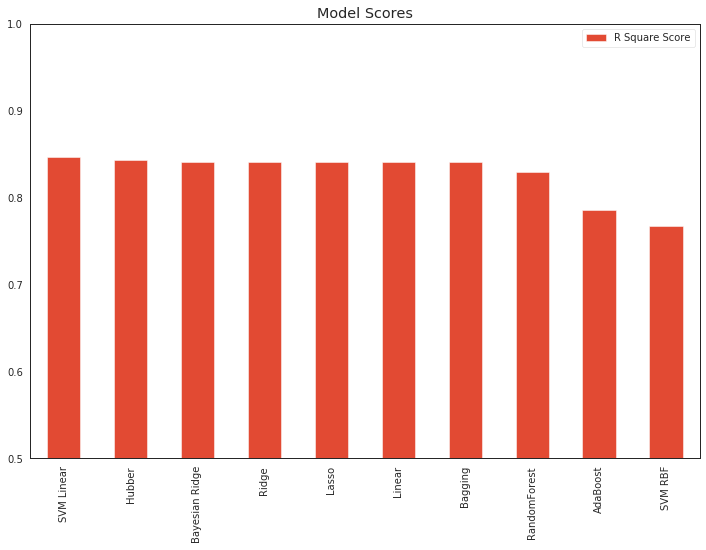

In [102]:
start_time = time.time()
# Split traing and test
df_train = dataPCA[:1460]
df_test = dataPCA[1460:]

print(lets_try(df_train, target_variable))
print(f"time - {time.time() - start_time}")

In [105]:
start_time = time.time()
cv = KFold(n_splits=5,shuffle=True,random_state=45)

parameters = {'alpha': [1000,100,10],
              'epsilon' : [1.2,1.25,1.50],
              'tol' : [1e-10]}

clf = linear_model.HuberRegressor()
r2 = make_scorer(r2_score)
grid_obj = GridSearchCV(clf, parameters, cv=cv,scoring=r2)
grid_fit = grid_obj.fit(df_train, target_variable)
best_clf = grid_fit.best_estimator_ 

best_clf.fit(df_train, target_variable)
print(f"time - {time.time() - start_time}")

time - 0.7065243721008301


In [106]:
start_time = time.time()
prediction_huber = best_clf.predict(df_test)
print(f"time - {time.time() - start_time}")

time - 0.0029668807983398438


In [107]:
sub = pd.DataFrame({
    "Id": test_id,
    "SalePrice": prediction_huber
})
sub.to_csv("prices_submision.csv", index=False)

In [108]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f prices_submision.csv -m "huber"

100%|██████████| 33.9k/33.9k [00:05<00:00, 6.85kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques